In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
chunk = 100000
datafile = 'practiceMonth.csv'
#tp = pd.read_csv(datafile, chunksize=chunk,
#                 usecols=['Probe', 'Latitude', 'Longitude',
#                          'Month', 'Depth', 'Temperature'],
#                dtype={'Probe': 'str', 'Latitude': 'float32', 'Longitude': 'float32'})
#prac_data = pd.concat(tp, ignore_index=True)
# datafile = 'W:\data\OTEC\practiceData3Years.csv'

prac_data = pd.read_csv(datafile, usecols=['Probe', 'Latitude', 'Longitude',
                          'Month', 'Depth', 'Temperature'],
                dtype={'Probe': 'str', 'Latitude': 'float32', 'Longitude': 'float32'})
prac_data.dropna(inplace=True)
prac_data.head()

,Probe,Latitude,Longitude,Month,Depth,Temperature
0,animal mounted,53.633301,-161.550003,1,4.0,4.21
1,animal mounted,53.633301,-161.550003,1,10.0,4.22
2,animal mounted,53.633301,-161.550003,1,20.0,4.21
3,animal mounted,53.633301,-161.550003,1,30.0,4.20
4,animal mounted,53.633301,-161.550003,1,50.0,4.21


In [5]:
import xarray
# Create xray Dataset from Pandas DataFrame
xr = xarray.Dataset.from_dataframe(prac_data)

# Save to netCDF
xr.to_netcdf('test.nc')


In [8]:
# import netCDF4 as nc
# fn = 'test.nc'
# ds = nc.Dataset(fn)
# df = ds.to_dataframe()
# df.head()

# opening .nc file
ds = xarray.open_dataset('test.nc')

# convert to pandas dataframe
df = ds.to_dataframe()
df.head()


,Probe,Latitude,Longitude,Month,Depth,Temperature
index,,,,,,
0,animal mounted,53.633301,-161.550003,1,4.0,4.21
1,animal mounted,53.633301,-161.550003,1,10.0,4.22
2,animal mounted,53.633301,-161.550003,1,20.0,4.21
3,animal mounted,53.633301,-161.550003,1,30.0,4.20
4,animal mounted,53.633301,-161.550003,1,50.0,4.21


In [21]:
# prefilter the prac_data to save space (optional)
# prac_data = prac_data[prac_data['Probe'].isin(probes)]
# prac_data = prac_data.loc[(minDep < prac_data['Depth']) & (prac_data['Depth'] < maxDep)]
# prac_data = prac_data.loc[(minLat < prac_data['Latitude']) & (prac_data['Latitude'] < maxLat)]
# prac_data = prac_data.loc[(minLong < prac_data['Longitude']) & (prac_data['Longitude'] < maxLong)]
# prac_data.head()
# prac_data.shape

In [41]:
max(prac_data['Depth'])

6025.45

In [50]:
num_bins = 100
minDep = 0
maxDep = math.ceil(max(prac_data['Depth']))
minLong = -70
maxLong = -60
minLat = 30
maxLat = 40
depthchunk = 15
areachunk = 10
depthLimit = 1500
#list of probes ['animal mounted', 'CTD', 'XCTD', 'drifting buoy', 'glider', 'moored buoy', 'bottle/rosette/net', 'profiling float', 'towed CTD', 'XBT']
probes = ['CTD', 'XCTD', 'drifting buoy', 'glider', 'moored buoy', 'bottle/rosette/net', 'profiling float', 'towed CTD']

Text(0.5, 1.0, 'Lat')

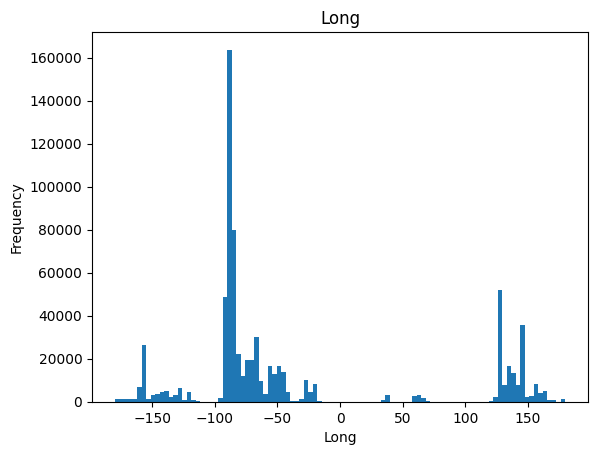

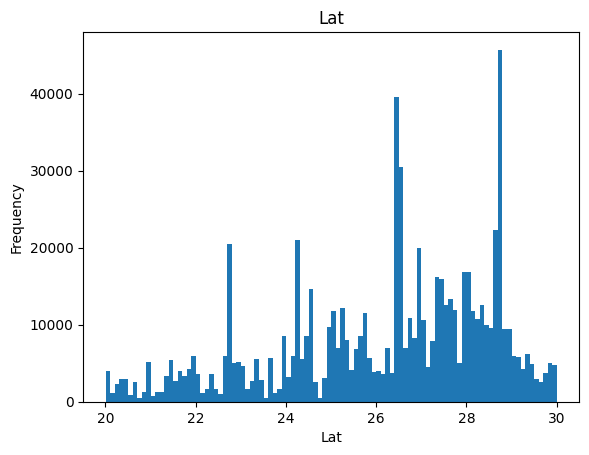

In [51]:
# check if data exists
temp_data = prac_data
# temp_data = temp_data[temp_data['Longitude'].between(minLong, maxLong)]
# temp_data = temp_data[temp_data['Latitude'].between(20, 30)]
# print(temp_data.head())

plt.figure()
plt.hist(temp_data['Longitude'], 100)
plt.xlabel('Long')
plt.ylabel('Frequency')
plt.title(f'Long')
          
plt.figure()
plt.hist(temp_data['Latitude'], 100)
plt.xlabel('Lat')
plt.ylabel('Frequency')
plt.title(f'Lat')

In [52]:
def generatePlots(num_bins, minDep, maxDep, minLong, maxLong, minLat, maxLat, depthchunk, areachunk, depthLimit):
    sigmas = []
    temps = []
    path = 'C:/Users/darre/Desktop/Jobs/Warsinger/OTEC/Results'
    for lat in range(minLat, maxLat, areachunk):
        for long in range(minLong, maxLong, areachunk):
            for dep in range(0, maxDep, depthchunk):
                if dep >= depthLimit:
                    break                
                temp_data = prac_data
                temp_data = temp_data[temp_data['Probe'].isin(probes)]
                temp_data = temp_data[temp_data['Depth'].between(dep, dep+depthchunk)]
                temp_data = temp_data[temp_data['Latitude'].between(lat, lat+areachunk)]
                temp_data = temp_data[temp_data['Longitude'].between(long, long+areachunk)]
                if temp_data.empty:
                    continue  
                # temp_data.to_csv(
                #     f'{path}/Data_long_{long}_{long+areachunk}_lat_{lat}_{lat+areachunk}_dep_{dep}_{dep+depthchunk}.csv')

                # x is depth, y is temperature
                y = temp_data["Temperature"]
                # plt.hist(y, 100)
                # plt.xlabel('Temperature (C)')
                # plt.ylabel('Frequency')
                # plt.title(f'Long: {long}-{long+areachunk}, Lat: {lat} to {lat+areachunk}, Dep: {dep} to {dep+depthchunk} Histogram\n',
                #           fontweight="bold")
                # plt.savefig(
                #     f'{path}/Histogram_long_{long}_{long+areachunk}_lat_{lat}_{lat+areachunk}_dep_{dep}_{dep+depthchunk}.png')
                # plt.clf()

                sigmas.append(np.std(temp_data["Temperature"]))
                temps.append(y)

            # Creating box and sigma plots
            # temperature boxplots for each depth range
            if len(temps) != 0:
                plt.boxplot(temps)
                plt.xlabel('Depth Range')
                plt.ylabel('Temperature (C)')
                plt.title(f'Temp Boxplot for Lat:{lat} to {lat+areachunk} Long:{long} to {long+areachunk}')
                plt.savefig(
                    f'{path}/Boxplot_long_{long}_{long+areachunk}_lat_{lat}_{lat+areachunk}.png')
                plt.clf()

            # sigma plots for each depth range
            if len(sigmas) != 0:
                plt.plot(sigmas)
                plt.xlabel('Depth Range')
                plt.ylabel('Standard Deviation')
                plt.title(f'Temp STD Curve for Lat:{lat} to {lat+areachunk} Long:{long} to {long+areachunk}')
                plt.savefig(
                    f'{path}/STDCurve_long_{long}_{long+areachunk}_lat_{lat}_{lat+areachunk}.png')
                plt.clf()
            sigmas = []
            temps = []

In [53]:
generatePlots(num_bins, minDep, maxDep, minLong, maxLong, minLat, maxLat, depthchunk, areachunk, depthLimit)

<Figure size 640x480 with 0 Axes>

In [18]:
# inputs = lat, long, month, depth
# use builtin pandas functions to filter data and get std
# compile data into a csv based on inputs
# use square area to get latitue and longitude range